### Run this first

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
style.use('seaborn-ticks')

import seaborn as sns
sns.set(color_codes=True)

import urllib.request
import json

### Importing Dataset

In [7]:
diamonds = sns.load_dataset('diamonds')
penguin = sns.load_dataset('penguins')
d = diamonds.copy()
p = penguin.copy()


# Tabulation

In [51]:
#url = 'https://data.covid19india.org/states_daily.json'
#urllib.request.urlretrieve(url,'data.json')

In [2]:
covid_data = pd.read_json('states_daily.json')

In [8]:
with open('states_daily.json') as f:
    data = json.load(f)
data = data['states_daily']

In [9]:
#covid_data = pd.DataFrame(data)
covid_data = pd.json_normalize(data)
covid_data.head()

an ap ar as br ch ct       date     dateymd dd  ... sk     status tg tn tr  \
0  0  1  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Confirmed  1  1  0   
1  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Recovered  0  0  0   
2  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0   Deceased  0  0  0   
3  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Confirmed  2  0  0   
4  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Recovered  1  0  0   

   tt un  up ut wb  
0  81  0  12  0  0  
1   9  0   4  0  0  
2   2  0   0  0  0  
3  27  0   1  0  0  
4   4  0   0  0  0  

[5 rows x 42 columns]

In [10]:
df = covid_data.copy()
df.date = pd.to_datetime(df.date)

In [11]:
df = df[df['status'] == 'Confirmed']

In [12]:
df.drop('status',axis=1,inplace=True)

In [13]:
df.set_index(df.date,inplace=True)
df.head()

an ap ar as br ch ct       date     dateymd dd  ... rj sk tg tn tr  \
date                                                       ...                  
2020-03-14  0  1  0  0  0  0  0 2020-03-14  2020-03-14  0  ...  3  0  1  1  0   
2020-03-15  0  0  0  0  0  0  0 2020-03-15  2020-03-15  0  ...  1  0  2  0  0   
2020-03-16  0  0  0  0  0  0  0 2020-03-16  2020-03-16  0  ...  0  0  1  0  0   
2020-03-17  0  0  0  0  0  0  0 2020-03-17  2020-03-17  0  ...  0  0  1  0  0   
2020-03-18  0  0  0  0  0  0  0 2020-03-18  2020-03-18  0  ...  3  0  8  1  0   

            tt un  up ut wb  
date                         
2020-03-14  81  0  12  0  0  
2020-03-15  27  0   1  0  0  
2020-03-16  15  0   0  1  0  
2020-03-17  11  0   2  0  1  
2020-03-18  37  0   2  1  0  

[5 rows x 41 columns]

In [14]:
df.drop(['date','dateymd','tt'],axis=1,inplace=True)

In [15]:
df = df.apply(pd.to_numeric)

In [16]:
df.tail()

an    ap   ar   as  br  ch  ct  dd  dl  dn  ...   py  rj   sk  \
date                                                    ...                 
2021-08-12   0  1859  180  935  43  12  98   0  49   1  ...  109  17  100   
2021-08-13   0  1746  166  763  47  15  77   0  50   0  ...  113  24  150   
2021-08-14   0  1535  161  755  39   4  83   0  50   0  ...  101  14  129   
2021-08-15   0  1506   48  411  28   1  49   0  53   0  ...   79  18  152   
2021-08-16   1   909  165  758  14   2  68   0  27   2  ...   49  11   20   

             tg    tn   tr  un  up  ut   wb  
date                                         
2021-08-12  453  1942  140   0  15  24  747  
2021-08-13  427  1933  180   0  25  27  739  
2021-08-14  420  1916  137   0  42  19  705  
2021-08-15  245  1896  142   0  30  16  673  
2021-08-16  405  1851   52   0  17  18  502  

[5 rows x 38 columns]

## Styling Tabulation

In [17]:
df_style = df.tail(7)

In [18]:
df_style.style

In [19]:
def color_red_negative(x):
    color = 'red' if x < 1 else 'white'
    return  'color: ' + color

In [20]:
# When you want to apply to all cells
df_style.style.applymap(color_red_negative)

In [16]:
df_stype = df.tail(7)

In [17]:
df_stype.style.highlight_max(color='red')

In [18]:
df_style.style.highlight_max(color='blue').highlight_min(color='green')

In [19]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else '' for y in is_max]

In [20]:
# When you want to apply to row wise or column wise
df_style.style.apply(bold_max_value)

In [21]:
# Kerala has max cases all the days
df_style.style.apply(bold_max_value).highlight_max(color='blue',axis=1)

In [22]:
df_style.style.background_gradient(cmap='Reds')

In [23]:
df_style.style.background_gradient(cmap='Reds',axis=1)

In [24]:
df_style.style.background_gradient(cmap='Reds',subset=['kl','mh','tn'])

In [26]:
df_style.style.bar()

In [27]:
df_style.style.bar(subset=['kl','tn','mh'])

In [28]:
df_style[['kl','tn','mh']].style.bar()

In [29]:
df_style[['kl','tn','mh']].style.bar(subset=['mh'],color='red').bar(subset=['kl'],color='blue').bar(subset=['tn'],color='orange')

# Distribution of data

## Distribution of single continous variable

### Histogram

In [72]:
x = np.random.randn(1000)

In [3]:
sns.set(color_codes=True)

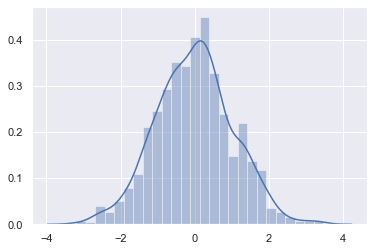

In [4]:
sns.distplot(x)

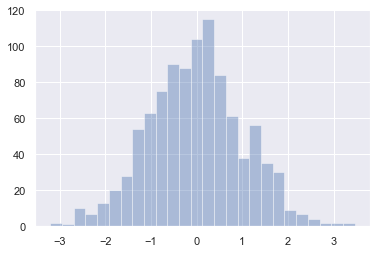

In [5]:
sns.distplot(x,kde=False)

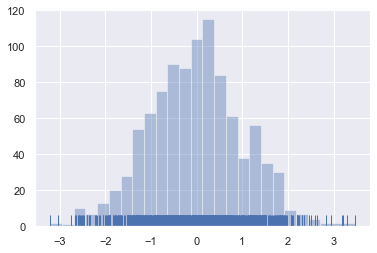

In [6]:
sns.distplot(x,kde=False,rug=True)

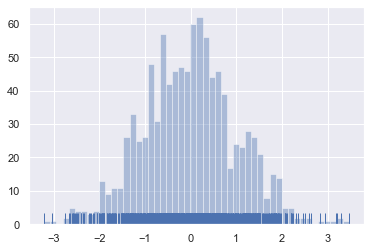

In [7]:
sns.distplot(x,kde=False,rug=True,bins=50)

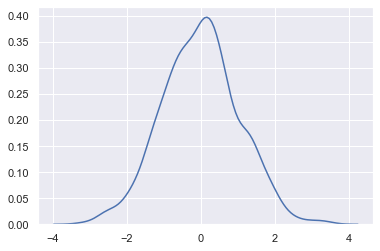

In [8]:
sns.kdeplot(x)

In [70]:
y = np.random.uniform(size=1000)

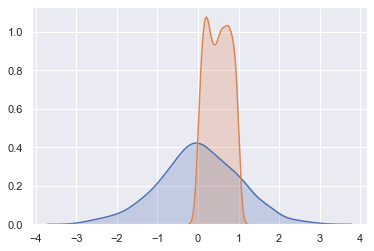

In [73]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True)

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [24]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Below Multi Modal distribution

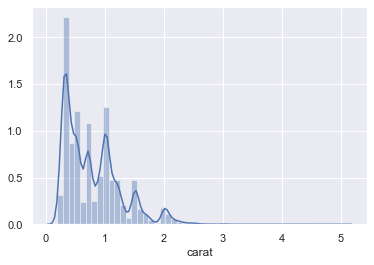

In [31]:
sns.distplot(diamonds['carat'])

#### Right-skew long tail distribution

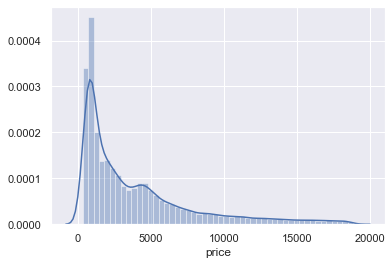

In [32]:
sns.distplot(diamonds['price'])

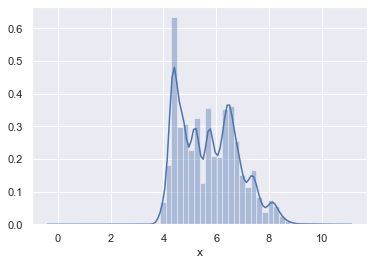

In [34]:
sns.distplot(diamonds['x'])

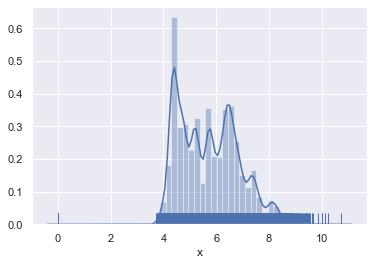

In [40]:
sns.distplot(diamonds['x'],rug=True)

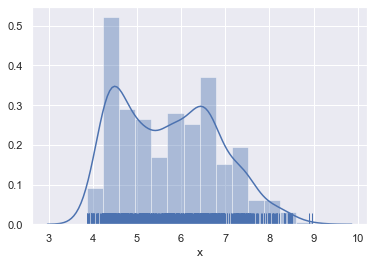

In [44]:
# diamonds['x'].sample(1000) - Gives the sample 1000 values from the data
sns.distplot(diamonds['x'].sample(1000),rug=True)

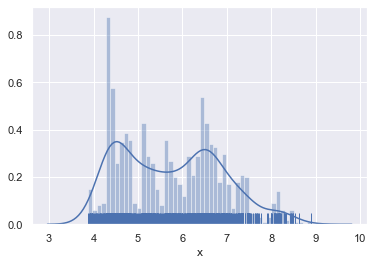

In [46]:
sns.distplot(diamonds['x'].sample(1000),rug=True,bins=50)

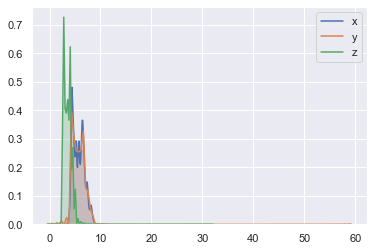

In [50]:
sns.kdeplot(diamonds['x'],shade=True)
sns.kdeplot(diamonds['y'],shade=True)
sns.kdeplot(diamonds['z'],shade=True)

### Box-Plot

#### Normal Distribution

In [81]:
norm = np.random.randn(1000)

##### By default, seaborn takes the whisker size to 1.5*IQR
Outside points are the outliers

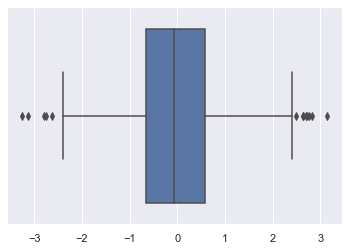

In [82]:
sns.boxplot(norm)

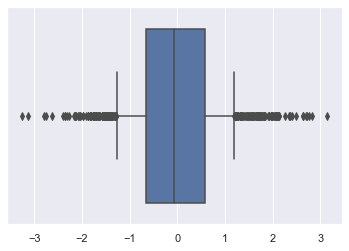

In [83]:
sns.boxplot(norm,whis=0.5)

#### Unifrom distribution

In [84]:
uni = np.random.uniform(size=1000)

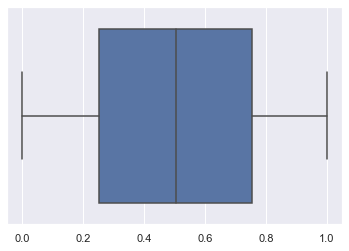

In [85]:
sns.boxplot(uni)

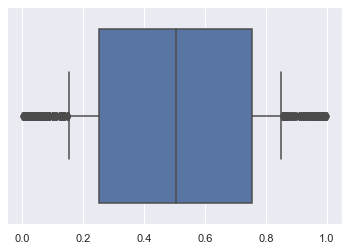

In [86]:
sns.boxplot(uni,whis=0.2)

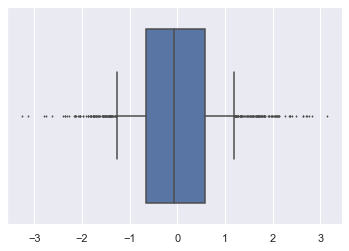

In [88]:
sns.boxplot(norm,whis=0.5,fliersize=1)

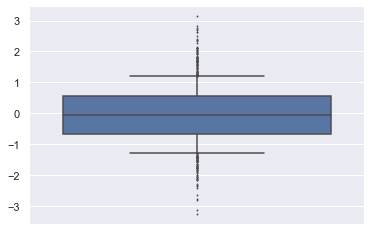

In [90]:
sns.boxplot(norm,whis=0.5,fliersize=1,orient='v')

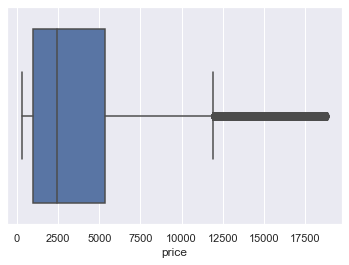

In [97]:
sns.boxplot(diamonds['price'])

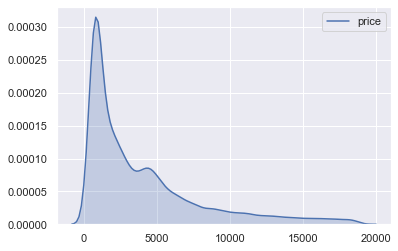

In [98]:
sns.kdeplot(diamonds['price'],shade=True)

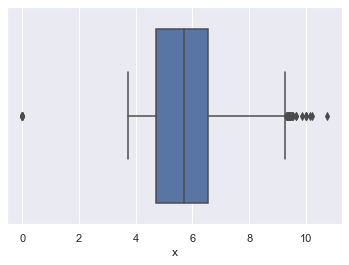

In [113]:
sns.boxplot(diamonds['x'])

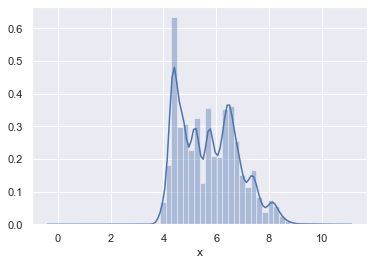

In [112]:
sns.distplot(diamonds['x'])

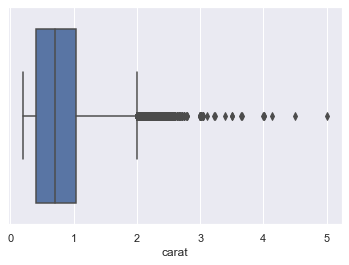

In [116]:
sns.boxplot(diamonds['carat'])

### Boxen Plot

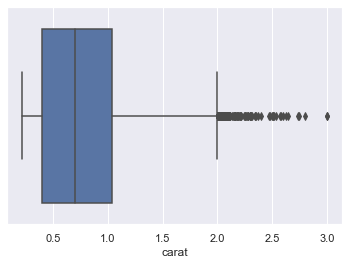

In [220]:
sns.boxplot(diamonds.sample(5000)['carat'])

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

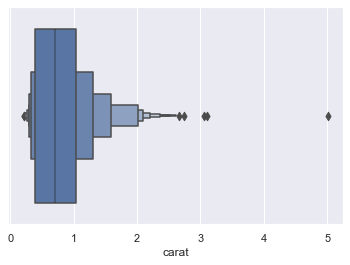

In [6]:
sns.boxenplot(diamonds.sample(5000)['carat'])

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

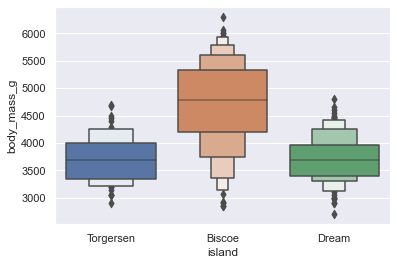

In [5]:
sns.boxenplot(x='island',y='body_mass_g',data=p)

## Distribution of a categorical/discrete variable

### Bar Plots

In [135]:
c = diamonds.groupby('cut')['cut'].count()

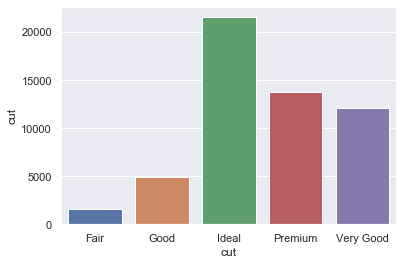

In [136]:
sns.barplot(x=c.index,y=c)

In [139]:
c = diamonds.groupby('clarity')['clarity'].count()

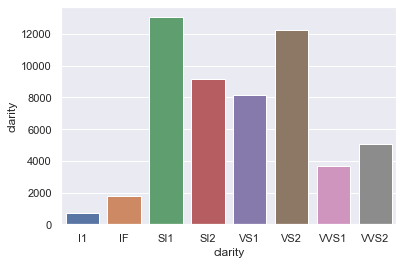

In [140]:
sns.barplot(x=c.index,y=c)

In [145]:
c = diamonds.groupby('color')['color'].count()

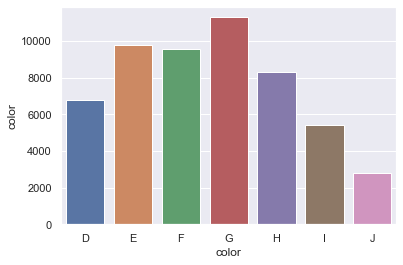

In [146]:
sns.barplot(x=c.index,y=c)

## Join distribution of two variables

### Joint Plot - Both the variable are continous

In [8]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [9]:
df = pd.DataFrame({'x': x,'y': y})

In [155]:
#sns.jointplot(x,y)
#sns.jointplot(df['x'],df['y'])

##### Below is the typical way we plot jointplot

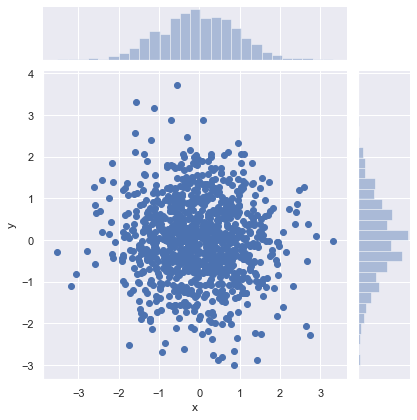

In [164]:
sns.jointplot('x','y',data=df)

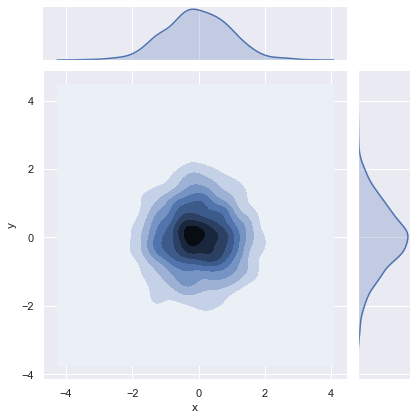

In [165]:
sns.jointplot('x','y',data=df,kind='kde')

In [174]:
x = np.random.normal(size=1000)
y = 3*x + np.random.normal(size=1000)/5
df = pd.DataFrame({'x': x,'y': y})

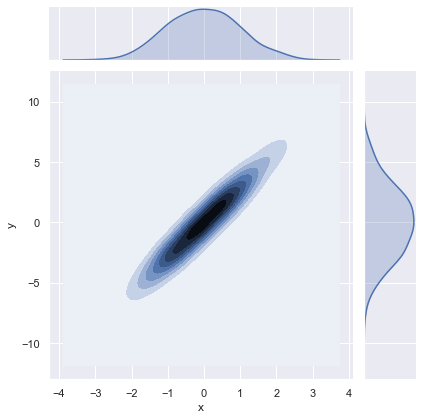

In [175]:
sns.jointplot('x','y',data=df,kind='kde')

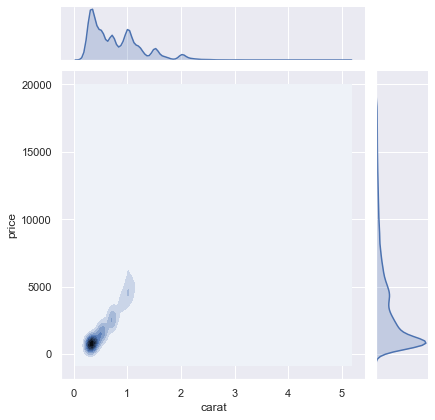

In [177]:
sns.jointplot('carat','price',data=diamonds,kind='kde')

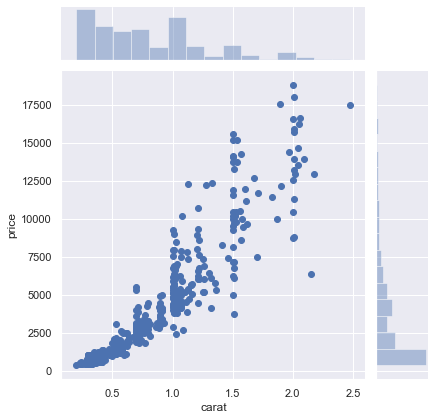

In [179]:
sns.jointplot('carat','price',data=diamonds.sample(500))

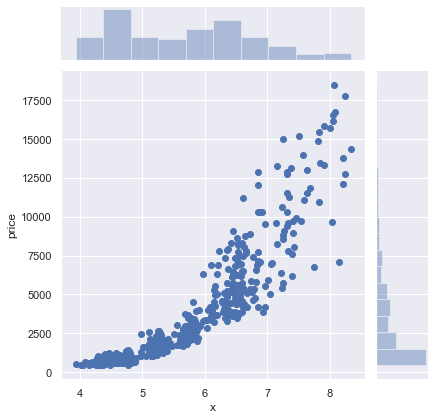

In [181]:
sns.jointplot('x','price',data=diamonds.sample(500))

In [ ]:
sns.jointplot('x','price',data=diamonds.sample(500),kind='kde')

### Swarm Plot

#### One continous and one categorical variable

#### Using a single variable

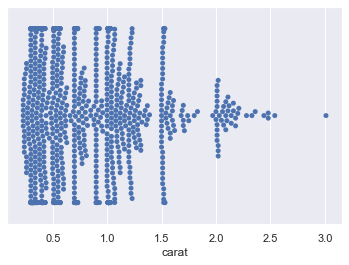

In [14]:
sns.swarmplot(diamonds['carat'].sample(1000))

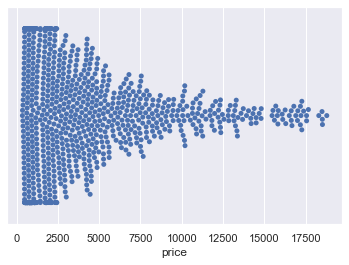

In [15]:
sns.swarmplot(diamonds['price'].sample(1000))

#### For Mutiple variables

In [16]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


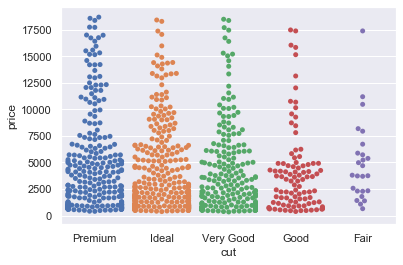

In [23]:
sns.swarmplot(x='cut',y='price',data=diamonds.sample(1000))

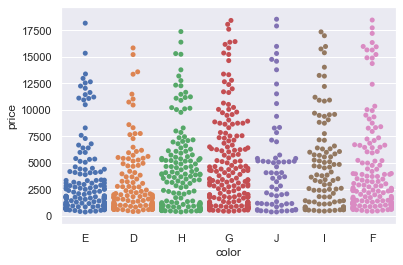

In [25]:
sns.swarmplot(x='color',y='price',data=diamonds.sample(1000))

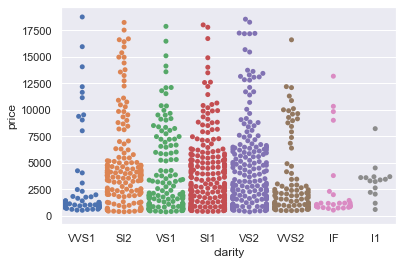

In [26]:
sns.swarmplot(x='clarity',y='price',data=diamonds.sample(1000))

In [28]:
penguin = sns.load_dataset('penguins')

In [34]:
penguin.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

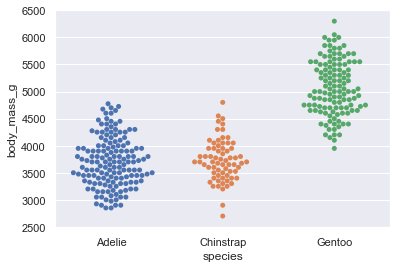

In [48]:
sns.swarmplot(x='species',y='body_mass_g', data=penguin)

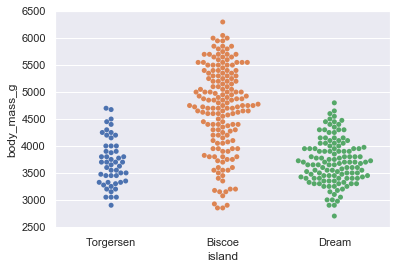

In [49]:
sns.swarmplot(x='island',y='body_mass_g', data=penguin)

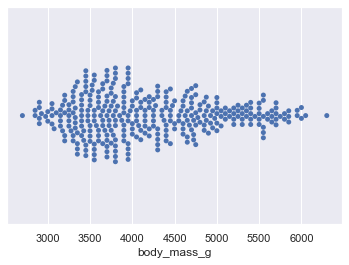

In [97]:
sns.swarmplot(x='body_mass_g', data=penguin)

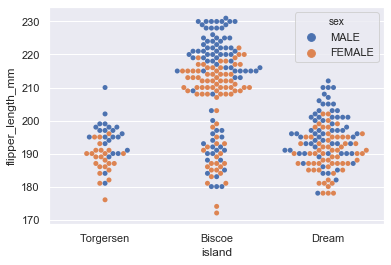

In [102]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=penguin)

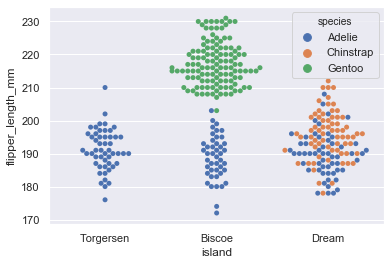

In [105]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=penguin)

### Violin Plot

#### Gives distribution info,IQR and median along with kde plot

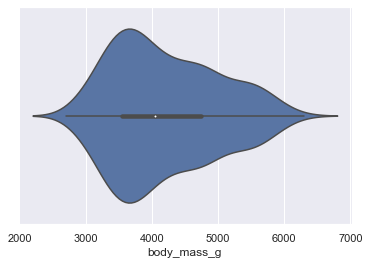

In [52]:
sns.violinplot(x='body_mass_g', data=penguin)

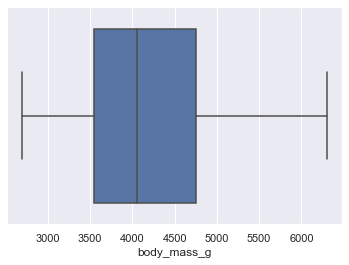

In [55]:
# Doesnt say anything about distribution of data
sns.boxplot(x='body_mass_g', data=penguin)

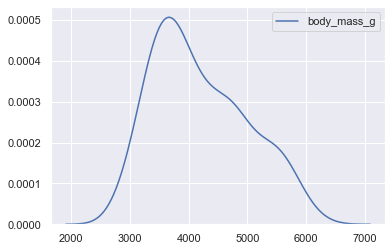

In [60]:
# Doesnt say anything about IQR and median
sns.kdeplot(penguin['body_mass_g'])

C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


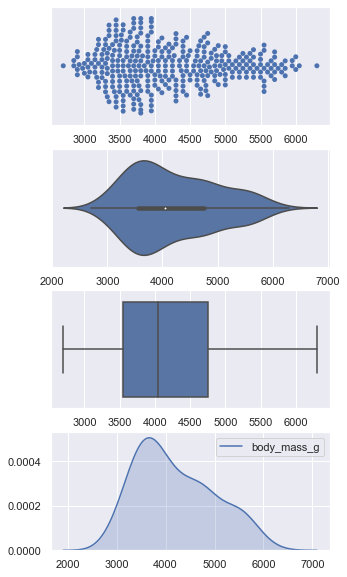

In [67]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5,10)
sns.swarmplot(x='body_mass_g', data=penguin, ax = axs[0])
sns.violinplot(x='body_mass_g', data=penguin, ax = axs[1])
sns.boxplot(x='body_mass_g', data=penguin, ax = axs[2])
sns.kdeplot(penguin['body_mass_g'],shade=True, ax = axs[3])

C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


[(2000, 7500)]

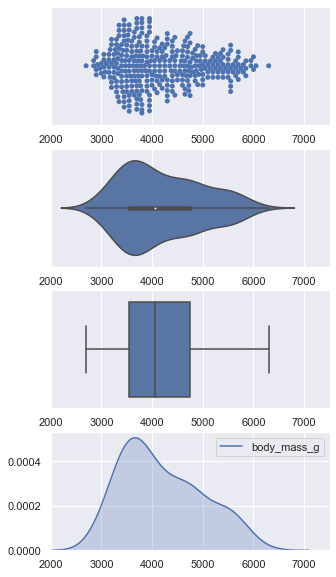

In [76]:
# align the axis for below charts
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5,10)
p1 = sns.swarmplot(x='body_mass_g', data=penguin, ax = axs[0])
p1.set(xlim=(2000,7500))

p2 = sns.violinplot(x='body_mass_g', data=penguin, ax = axs[1])
p2.set(xlim=(2000,7500))

p3 = sns.boxplot(x='body_mass_g', data=penguin, ax = axs[2])
p3.set(xlim=(2000,7500))

p4 = sns.kdeplot(penguin['body_mass_g'],shade=True, ax = axs[3])
p4.set(xlim=(2000,7500))

C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


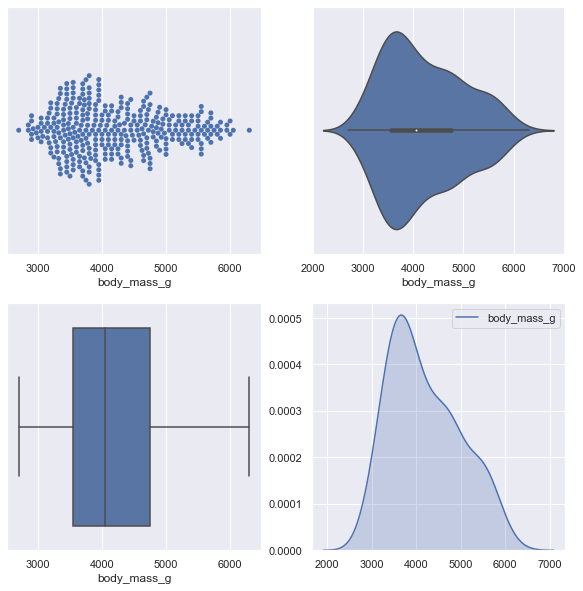

In [77]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
sns.swarmplot(x='body_mass_g', data=penguin, ax = axs[0][0])
sns.violinplot(x='body_mass_g', data=penguin, ax = axs[0][1])
sns.boxplot(x='body_mass_g', data=penguin, ax = axs[1][0])
sns.kdeplot(penguin['body_mass_g'],shade=True, ax = axs[1][1])

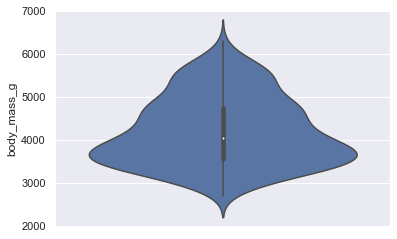

In [88]:
sns.violinplot(x='body_mass_g', data=penguin, orient='v')

### Multiple Violin Plots

#### Violing plot for 2 varaibles, 1 continous and 1 categorical

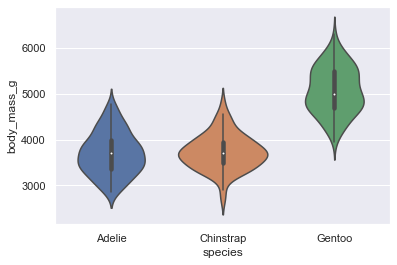

In [86]:
sns.violinplot(x='species', y='body_mass_g', data=penguin)

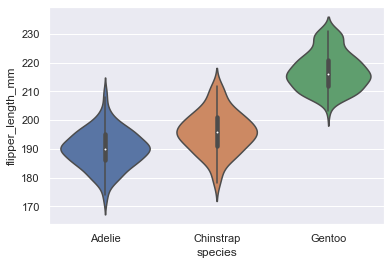

In [91]:
sns.violinplot(x='species', y='flipper_length_mm', data=penguin)

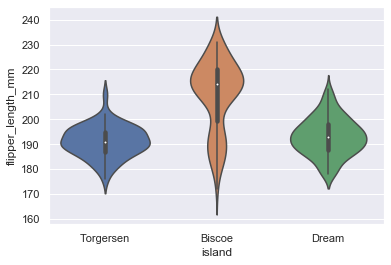

In [94]:
sns.violinplot(x='island', y='flipper_length_mm', data=penguin)

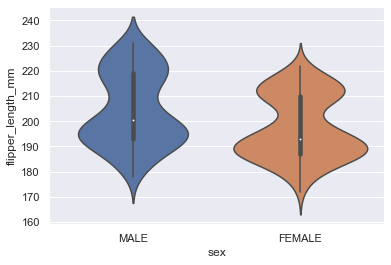

In [109]:
sns.violinplot(x='sex', y='flipper_length_mm', data=penguin)

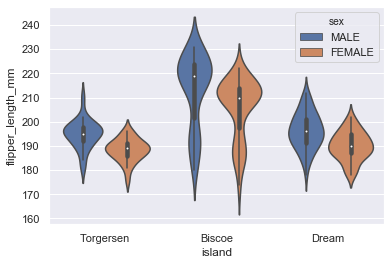

In [110]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', data=penguin)

C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\malla\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


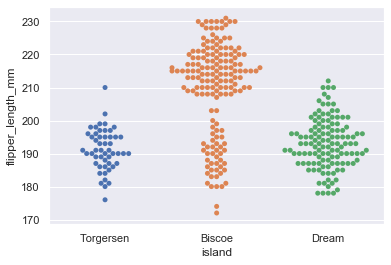

In [96]:
sns.swarmplot(x='island', y='flipper_length_mm', data=penguin)

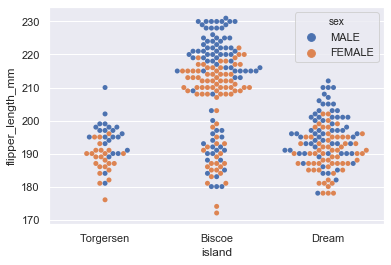

In [107]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=penguin)

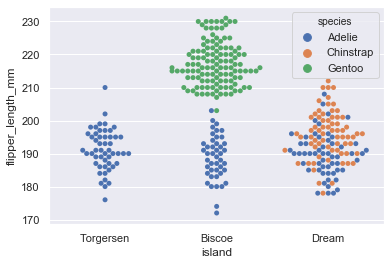

In [108]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=penguin)

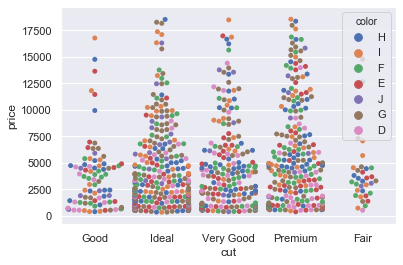

In [123]:
sns.swarmplot(x='cut', y='price', hue='color', data=diamonds.sample(1000))

### Paired Violin Plots

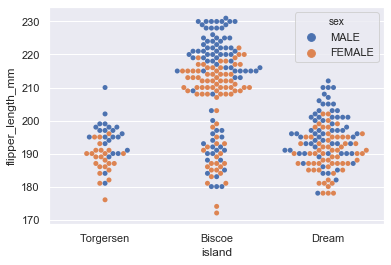

In [125]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=penguin)

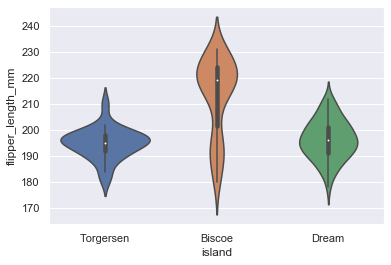

In [135]:
sns.violinplot(x='island', y='flipper_length_mm',data=penguin[penguin['sex'] == 'MALE'])

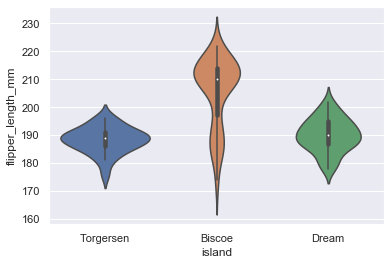

In [133]:
sns.violinplot(x='island', y='flipper_length_mm',data=penguin[penguin['sex'] == 'FEMALE'])

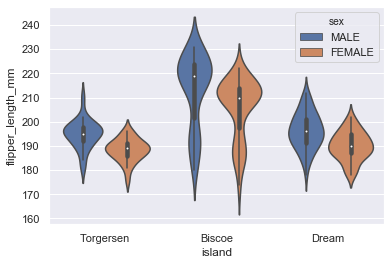

In [138]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', data=penguin)

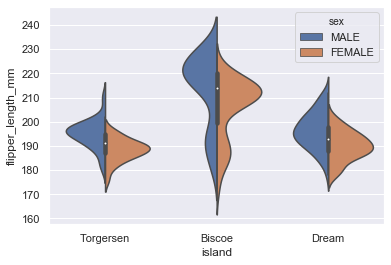

In [140]:
# Paired violin plot
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, data=penguin)

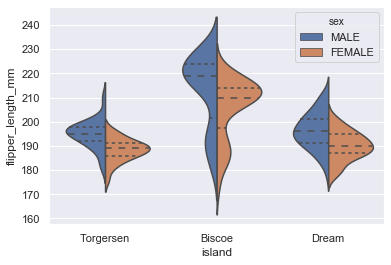

In [141]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, inner='quartile', data=penguin)

In [143]:
#There must be exactly two hue levels to use `split`.'
sns.violinplot(x='island', y='flipper_length_mm', hue='species', split=True, inner='quartile', data=penguin)

ValueError: There must be exactly two hue levels to use `split`.'

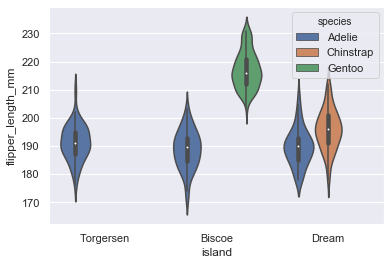

In [145]:
#There must be exactly two hue levels to use `split`.'
sns.violinplot(x='island', y='flipper_length_mm', hue='species', data=penguin)

In [147]:
#There must be exactly two hue levels to use `split`.'
sns.violinplot(x='island', y='flipper_length_mm', hue='species', split=True, inner='quartile', data=penguin)

ValueError: There must be exactly two hue levels to use `split`.'

#### To solve above problem we can caonvert 3 categroical values to 2

In [4]:
p = penguin.copy()
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

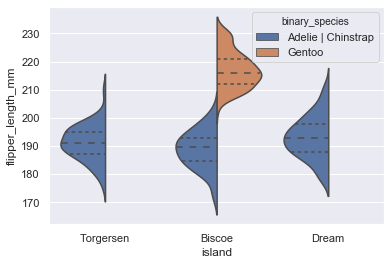

In [156]:
#There must be exactly two hue levels to use `split`.'
sns.violinplot(x='island', y='flipper_length_mm', hue='binary_species', split=True, inner='quartile', data=p)

### Faceted Plotting

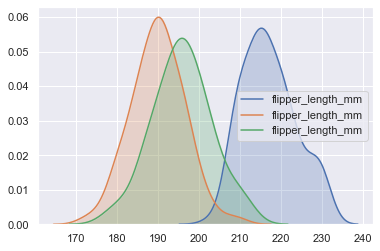

In [161]:
sns.kdeplot(p[p.species == 'Gentoo']['flipper_length_mm'],shade=True)
sns.kdeplot(p[p.species == 'Adelie']['flipper_length_mm'],shade=True)
sns.kdeplot(p[p.species == 'Chinstrap']['flipper_length_mm'],shade=True)

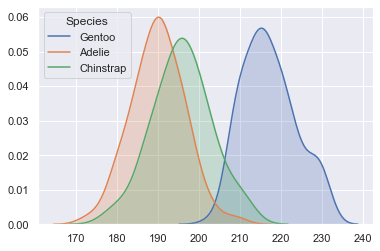

In [162]:
sns.kdeplot(p[p.species == 'Gentoo']['flipper_length_mm'],shade=True)
sns.kdeplot(p[p.species == 'Adelie']['flipper_length_mm'],shade=True)
sns.kdeplot(p[p.species == 'Chinstrap']['flipper_length_mm'],shade=True)
plt.legend(title='Species',labels=['Gentoo','Adelie','Chinstrap'])

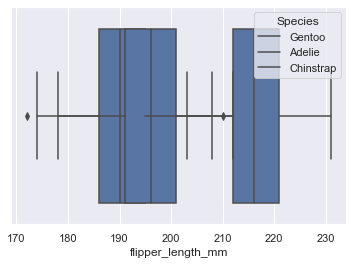

In [164]:
sns.boxplot(p[p.species == 'Gentoo']['flipper_length_mm'])
sns.boxplot(p[p.species == 'Adelie']['flipper_length_mm'])
sns.boxplot(p[p.species == 'Chinstrap']['flipper_length_mm'])
plt.legend(title='Species',labels=['Gentoo','Adelie','Chinstrap'])

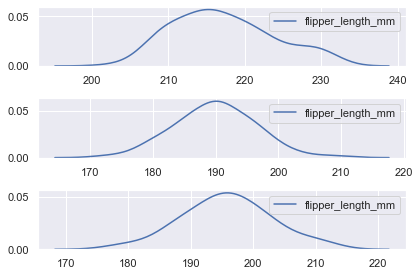

In [171]:
fig, axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo']['flipper_length_mm'],ax=axs[0])
sns.kdeplot(p[p.species == 'Adelie']['flipper_length_mm'],ax=axs[1])
sns.kdeplot(p[p.species == 'Chinstrap']['flipper_length_mm'],ax=axs[2])
plt.tight_layout()

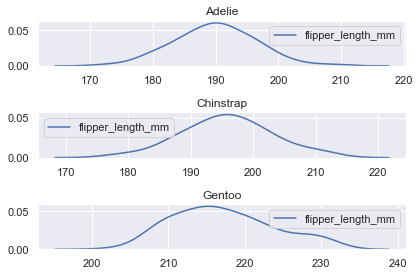

In [174]:
fig, axs = plt.subplots(nrows = 3)
column_name = 'species'
nrows = len(p[column_name].unique())
i=0
for c in p[column_name].unique():
    pl = sns.kdeplot(p[p.species == c]['flipper_length_mm'],ax=axs[i])
    pl.set_title(c)
    i+=1
    
plt.tight_layout()

#### The above can be done efficiently with faceted grid

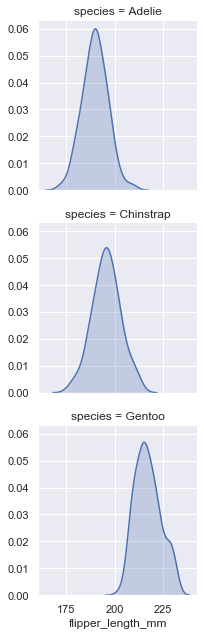

In [184]:
g = sns.FacetGrid(p,row='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

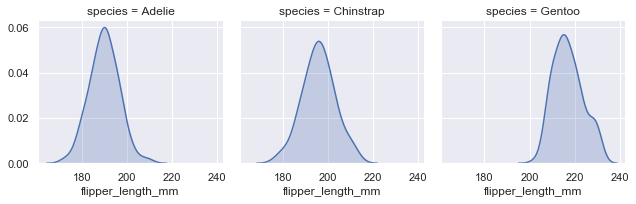

In [185]:
g = sns.FacetGrid(p,col='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

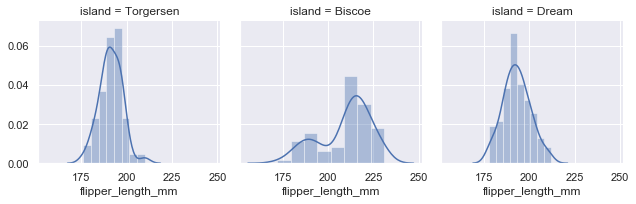

In [188]:
g = sns.FacetGrid(p,col='island')
g.map(sns.distplot,'flipper_length_mm')

C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

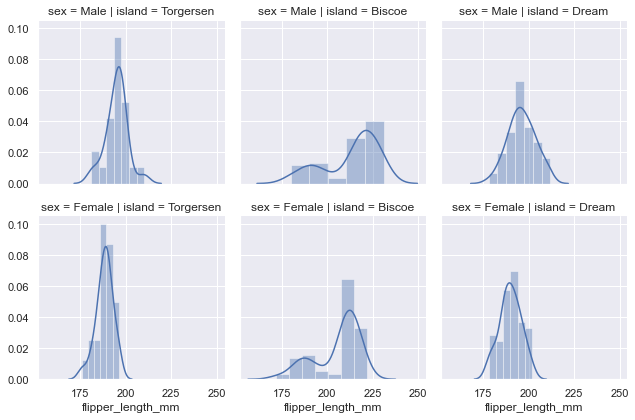

In [11]:
g = sns.FacetGrid(p,col='island',row='sex')
g.map(sns.distplot,'flipper_length_mm')

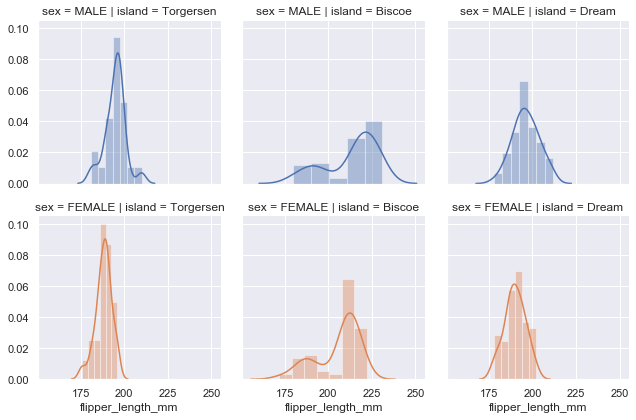

In [196]:
g = sns.FacetGrid(p,col='island',row='sex',hue='sex')
g.map(sns.distplot,'flipper_length_mm')

C:\Users\malla\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


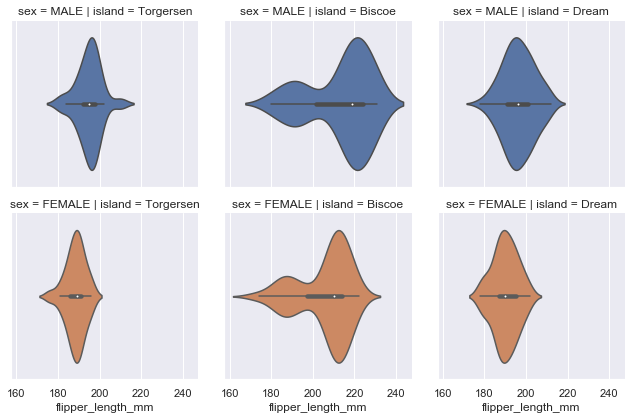

In [197]:
g = sns.FacetGrid(p,col='island',row='sex',hue='sex')
g.map(sns.violinplot,'flipper_length_mm')

### Pair Plot

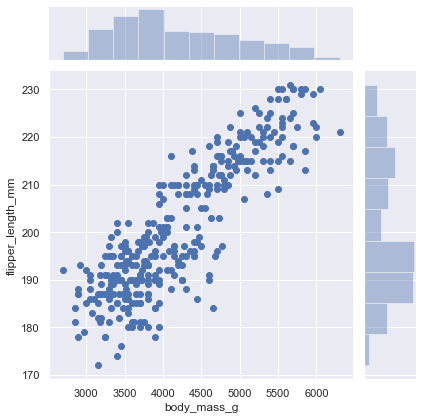

In [200]:
sns.jointplot(p.body_mass_g,p.flipper_length_mm)

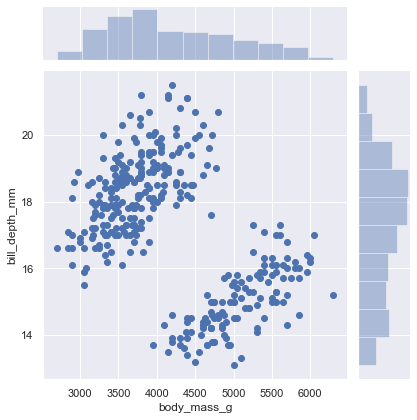

In [204]:
sns.jointplot(p.body_mass_g,p.bill_depth_mm)

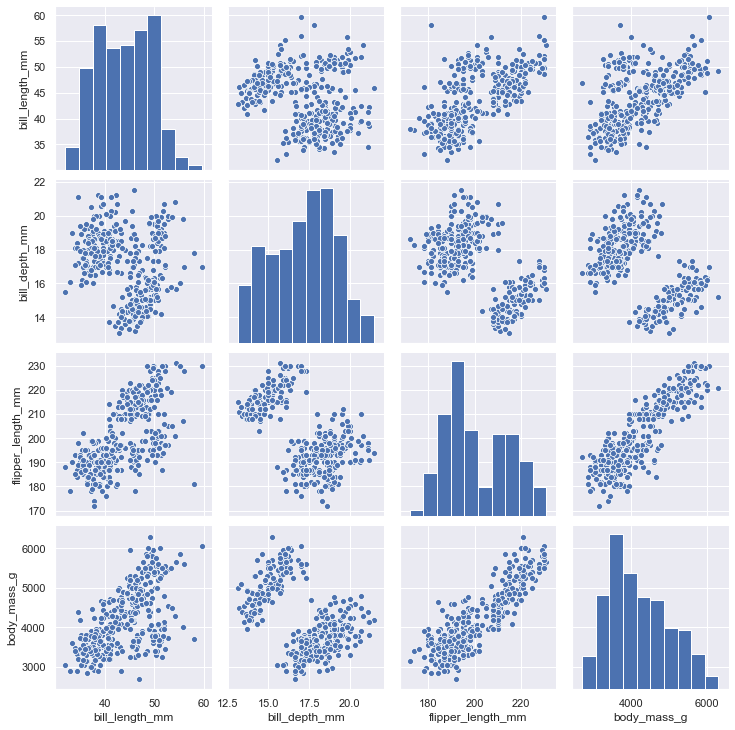

In [206]:
sns.pairplot(p)

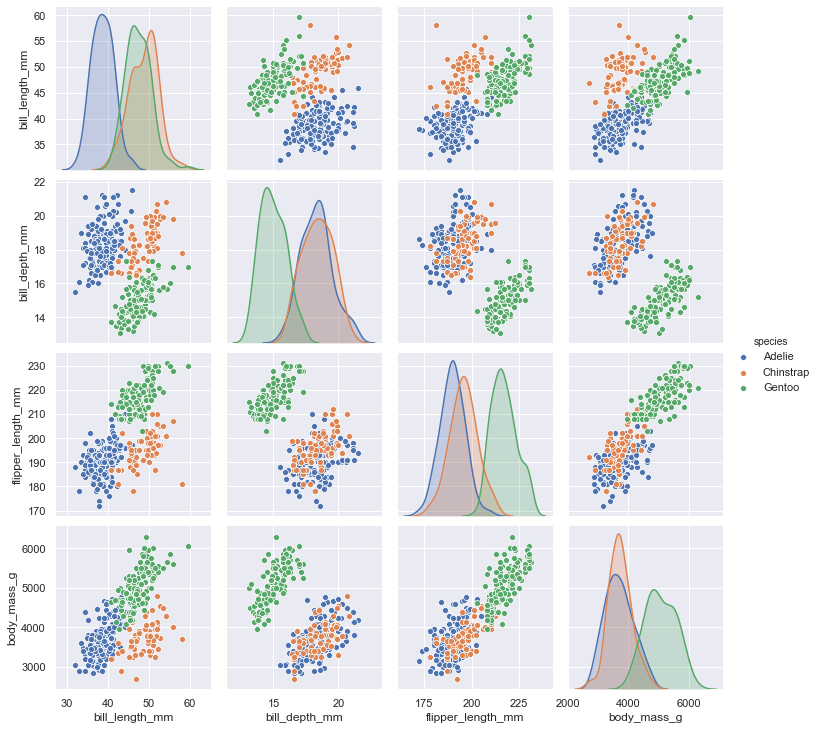

In [211]:
sns.pairplot(p,hue='species')

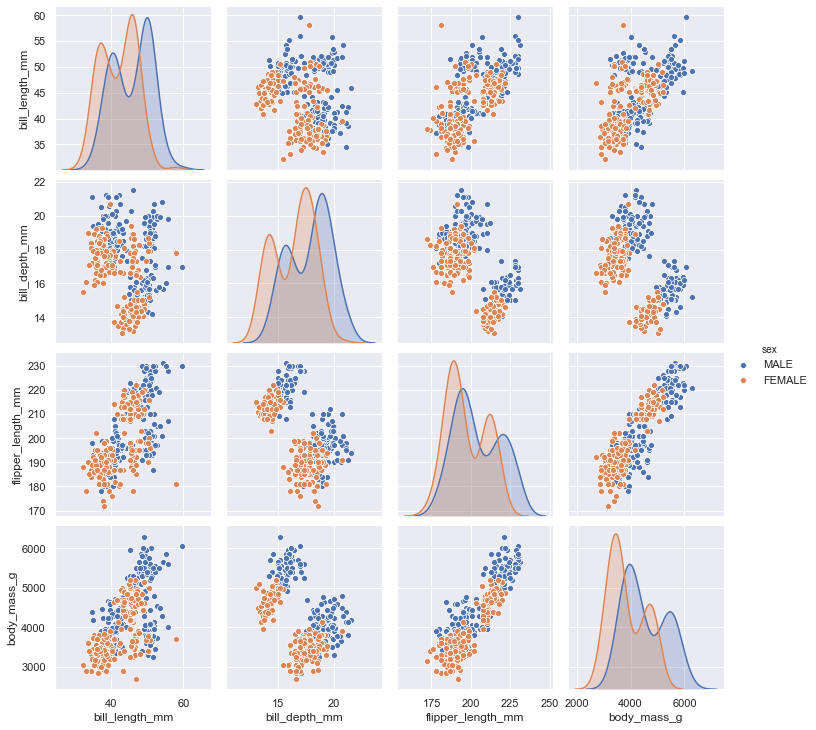

In [212]:
sns.pairplot(p,hue='sex')

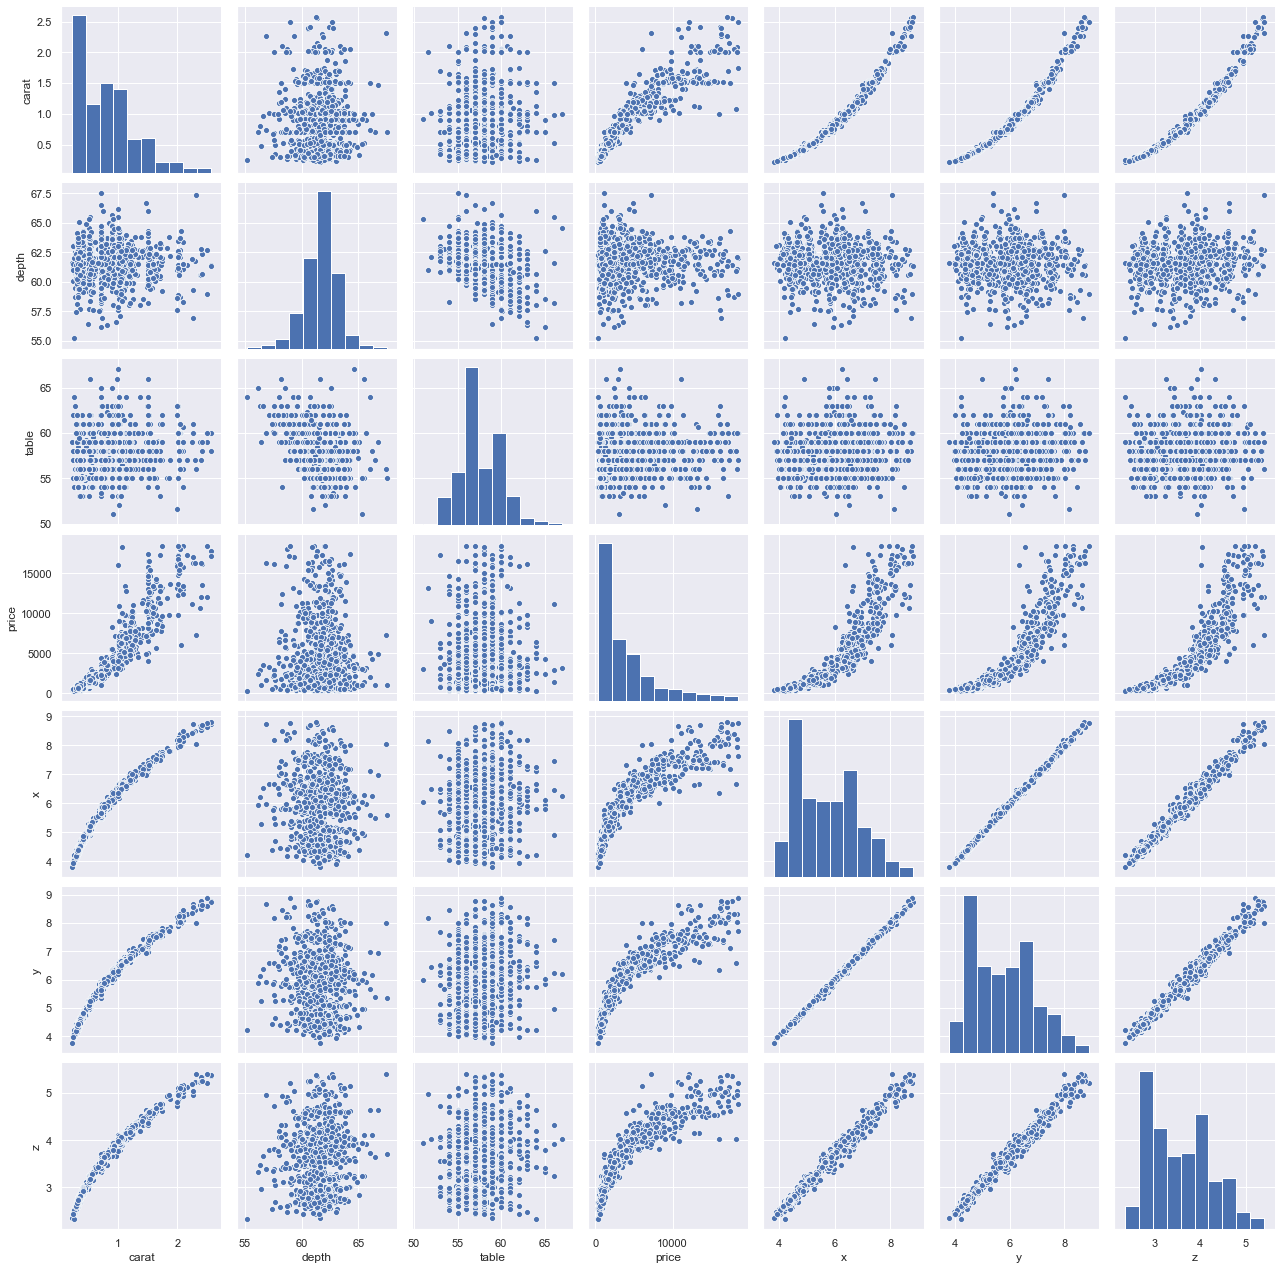

In [213]:
sns.pairplot(diamonds.sample(1000))

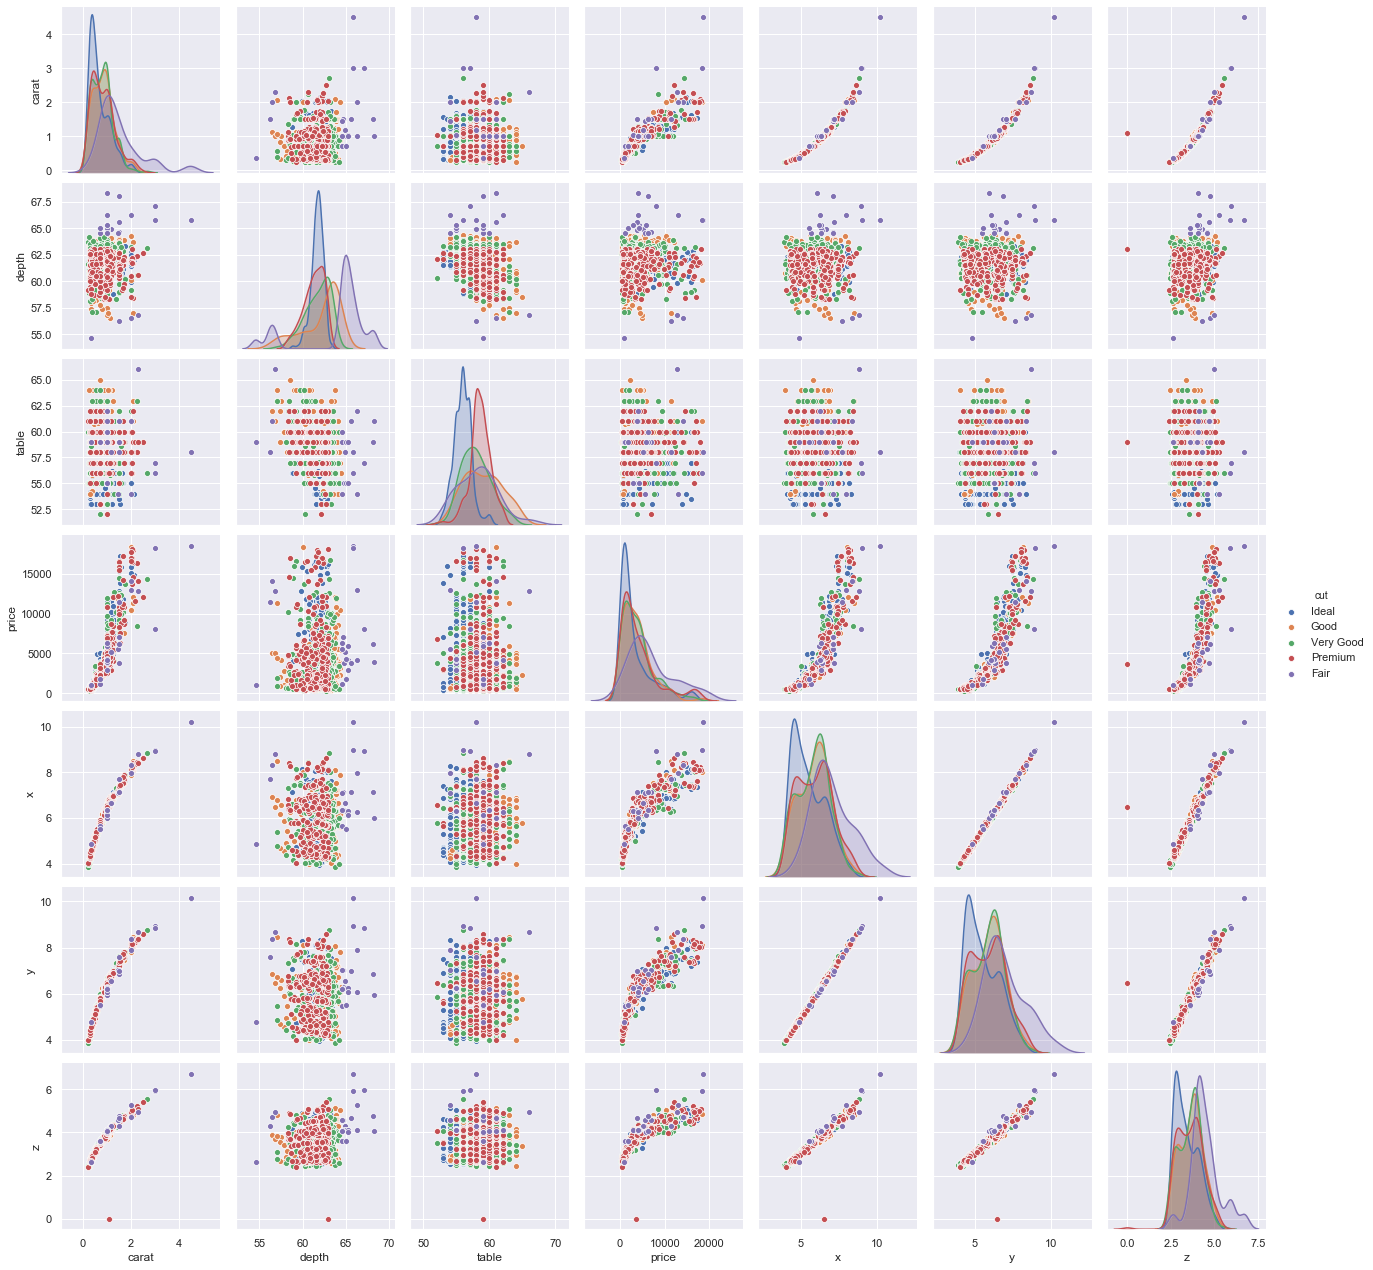

In [216]:
sns.pairplot(diamonds.sample(1000),hue='cut')

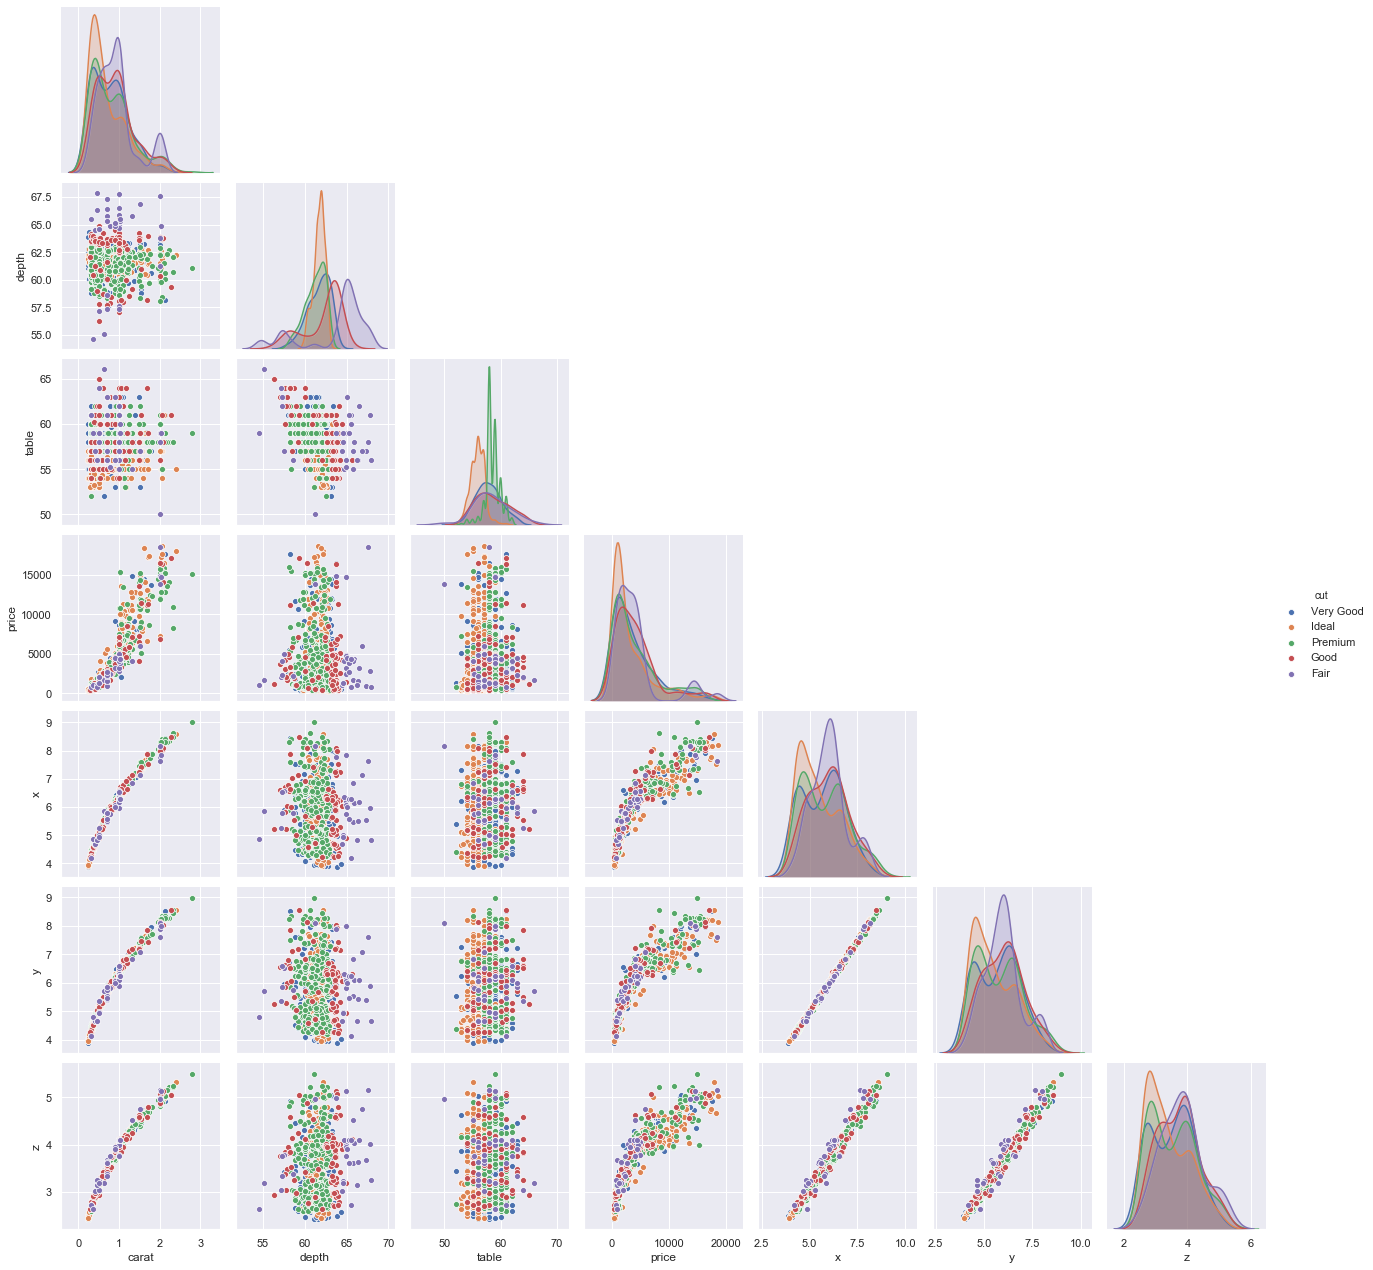

In [217]:
sns.pairplot(diamonds.sample(1000),hue='cut',corner=True)